In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Diabetes_Prediction _Model\diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [197]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [198]:
df.shape

(768, 9)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [200]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [201]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [202]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [203]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

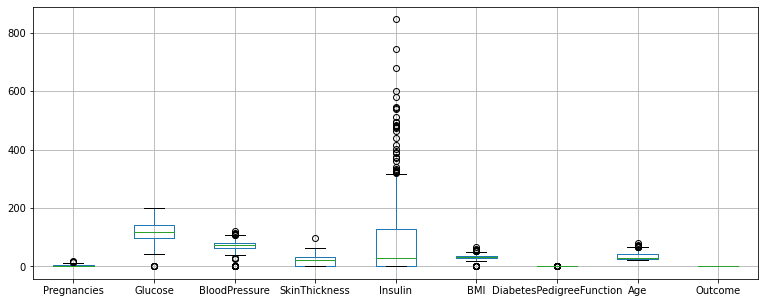

In [204]:
df.boxplot(figsize=(13,5))
plt.show()

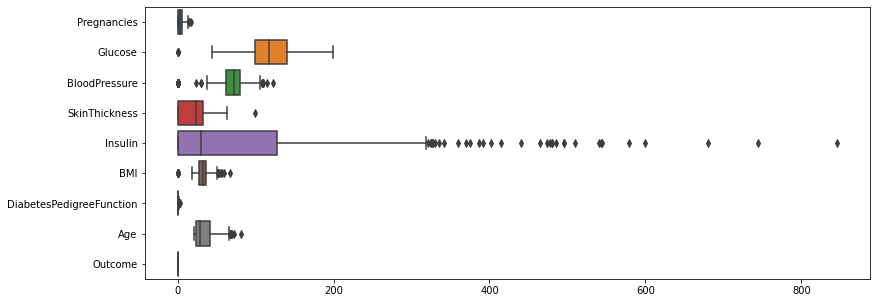

In [205]:
plt.figure(figsize=(13,5))
sns.boxplot(data = df,orient='h')
plt.show()

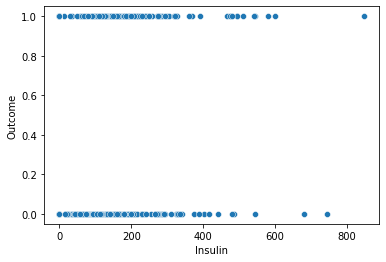

In [206]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])
plt.show()

# Replacing 0 with Mean with Respective Columns

In [207]:
X=df.drop('Outcome',axis=1)

In [208]:
Y=df['Outcome']

In [209]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [210]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

In [211]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


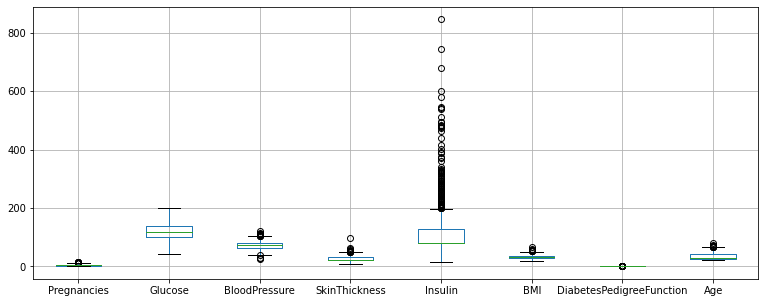

In [212]:
X.boxplot(figsize=(13,5))
plt.show()

In [213]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [214]:
from sklearn.model_selection import train_test_split

In [241]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [242]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
341,1.000000,95.000000,74.0,21.000000,73.000000,25.9,0.673,36
146,9.000000,57.000000,80.0,37.000000,79.799479,32.8,0.096,41
372,3.845052,84.000000,64.0,22.000000,66.000000,35.8,0.545,21
204,6.000000,103.000000,72.0,32.000000,190.000000,37.7,0.324,55
450,1.000000,82.000000,64.0,13.000000,95.000000,21.2,0.415,23
...,...,...,...,...,...,...,...,...
75,1.000000,120.894531,48.0,20.000000,79.799479,24.7,0.140,22
599,1.000000,109.000000,38.0,18.000000,120.000000,23.1,0.407,26
575,1.000000,119.000000,44.0,47.000000,63.000000,35.5,0.280,25
337,5.000000,115.000000,76.0,20.536458,79.799479,31.2,0.343,44


In [217]:
Y_train

150    0
755    1
381    0
245    1
758    0
      ..
333    0
440    1
704    0
572    0
433    0
Name: Outcome, Length: 576, dtype: int64

In [218]:
X_test    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
505,10.000000,75.0,82.000000,20.536458,79.799479,33.3,0.263,38
432,1.000000,80.0,74.000000,11.000000,60.000000,30.0,0.527,22
25,10.000000,125.0,70.000000,26.000000,115.000000,31.1,0.205,41
201,1.000000,138.0,82.000000,20.536458,79.799479,40.1,0.236,28
309,2.000000,124.0,68.000000,28.000000,205.000000,32.9,0.875,30
...,...,...,...,...,...,...,...,...
365,5.000000,99.0,54.000000,28.000000,83.000000,34.0,0.499,30
464,10.000000,115.0,98.000000,20.536458,79.799479,24.0,1.022,34
300,3.845052,167.0,69.105469,20.536458,79.799479,32.3,0.839,30
545,8.000000,186.0,90.000000,35.000000,225.000000,34.5,0.423,37


In [243]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
593    0
335    0
473    0
130    1
48     1
Name: Outcome, Length: 192, dtype: int64

# Standard Scaler 

In [244]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [245]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [246]:
X_test_std

array([[-1.15569536,  0.15276541, -1.02948089, ..., -0.34389886,
        -0.40008012,  1.15166521],
       [-0.47004343,  2.17633194, -0.19332388, ...,  0.56057076,
        -0.21234265,  0.22975102],
       [ 0.90126041, -0.51069902,  1.64622154, ..., -1.40629175,
        -0.76282708,  1.23547559],
       ...,
       [ 0.90126041,  0.48449763,  1.47899014, ..., -0.37261218,
        -0.84237685,  1.40309635],
       [-0.12721747,  1.71190684, -0.19332388, ..., -0.4013255 ,
        -0.36189622, -0.02168012],
       [ 0.90126041, -0.61021869, -0.52778669, ...,  0.94820059,
        -0.41599007, -0.18930088]])

In [247]:
 X_train_std

array([[-1.15569536, -0.87560446,  0.14113892, ..., -0.94687861,
         0.63088494,  0.22975102],
       [ 1.58691234, -2.13618689,  0.64283313, ...,  0.04373097,
        -1.20512382,  0.64880292],
       [-0.18033764, -1.2405099 , -0.69501809, ...,  0.47443079,
         0.22359011, -1.02740468],
       ...,
       [-1.15569536, -0.07944714, -2.36733211, ...,  0.43136081,
        -0.61963749, -0.69216316],
       [ 0.21560849, -0.21214003,  0.30837032, ..., -0.18597559,
        -0.41917206,  0.90023407],
       [ 1.58691234,  0.2854583 , -0.19332388, ...,  0.24472422,
         0.56406313,  0.98404445]])

# Train our Model

# Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [249]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [250]:
Y_pred=lr.predict(X_train_std)

In [251]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [252]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
593    0
335    0
473    0
130    1
48     1
Name: Outcome, Length: 192, dtype: int64

In [253]:
from sklearn.metrics import accuracy_score

In [257]:
accuracy_score(Y_train,Y_pred)  

0.7760416666666666

# Decision Tree

In [259]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [260]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [261]:
Y_pred = dt.predict(X_test_std)

In [262]:
Y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [263]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
593    0
335    0
473    0
130    1
48     1
Name: Outcome, Length: 192, dtype: int64

In [264]:
accuracy_score(Y_test,Y_pred)

0.7239583333333334

# Deep Learning

In [286]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(8,8,8))

In [287]:
mlp.fit(X_train_std,Y_train)

C:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8, 8))

In [288]:
Y_pred=mlp.predict(X_test_std)

In [289]:
accuracy_score(Y_test,Y_pred) * 100

78.64583333333334